# Exercise Sheet 2

In this exercise we perform character recognition using SVM and NN classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sklearn as skl
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/home/kenneth/Data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [3]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [4]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148
  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  87 232 252 253 189 

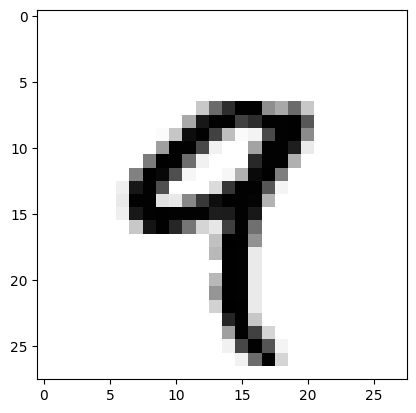

In [5]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index,:]))
print("Target of datapoint no. {}:\n{}\n".format(index,mnist.target[index])) ## Added the target value of index 4
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



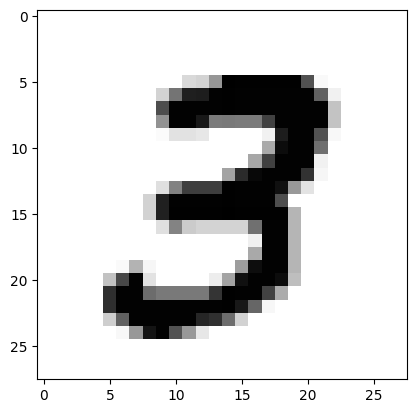

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [6]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [7]:
## Exercise: Split the mnist_bin data into training and test set. 

from sklearn.model_selection import train_test_split

## Splitting the data set into a test and train. This only holds 3 and 7, as per split in previous section
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, random_state=1) ## test size 25% and training 75%

In [8]:
## Exercise: Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN)
import time

## In the below section we learn a SVM model with a linear kernel type. We measure the time it takes to learn the model (as is done in the coming sections as well) to know
## how long it takes and hence include that when evaluating the performance of the model.

kernel_type = 'linear'
start=time.time()
linear_svm = SVC(kernel=kernel_type).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = linear_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = linear_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the linear kernel model: 3.36 seconds
Training Accuracy: 1.00
Test Accuracy: 0.98


The SVM linear model is done in 4 seconds and has a test accuracy of 98% and 100% on the training set.

This suggest a model which overfits the data

In [12]:
## Exercise: Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN)
import time

## In the next section we learn a SVM model, this time with a rbf kernel type. Gamma is set to 0.1 and not altered during this exercise.


kernel_type = 'rbf'
start=time.time()
kernel_svm = SVC(kernel=kernel_type, gamma=0.1).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = kernel_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = kernel_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the rbf kernel model: 131.57 seconds
Training Accuracy: 1.00
Test Accuracy: 0.51


The SVM model using the rbf kernel takes 133 seconds and gets 51% in accuracy on the test data and 100% on the training data.

Comparing the two SVM the latter (kernel = rbf) performs poorly (51%) compared to the first (kernel = linear) (98%). Also the latter takes more than 2 min compared to only 4 seconds in the first model.

Again we see a 100% fit on training data, which again suggest overfitting. With 51% on test data, the models does not have a great generalizability.

Since the linear kernel outperforms the rbf it suggests that the problem has more of a linear nature.

Next section turns to neural networks - let's see how they perform.

# Neural Networks

This next section is rather expansive, so let's run through the intention.

The overall purpose is to define multiple NN configurations, including changing the solver.

Neural networks can have 0 or more hidden layers. For each layer it's possible to configure the number of nodes. E.g. () denotes no hidden layers, (10, 10, 10) denotes three layers each layer containing to nodes. The construction of the layers and number of nodes is it's architecture.
Furthermore it possible to set the activation to a number of variations. Here relu and tanh is used.
The NN can be configured with different solvers, here also provided as input parameter using lbfgs and adam.
To find a well performing model, several iterates are run through in order to find a good (valley) mode. The number of iterations can be set and impacts the model ability to find a convergence point. A model converges once its ability to improve the loss function decreases, meaning that from one iteration to the next there is very little or no improvement in the loss function. The loss function measured the model ability to predict versus the true target value. For each iteration a model is devised and it used to predict an outcome. The outcome of the prediction is then compared to the actual true value. In our case, this would amount to the model being learned and a data point being provided for the model to predict the outcome. If it predicts 3 and the actual true value is 7, then the prediction is incorrect. The loss function is impacted. In the next iteration it predicts 7 and the true value is 7, the loss function is better and hence there is a change from first to next iteration. At some point the models ability to predict changes little and the loss function changes is therefore little. The model has converged. 
A model can run out of iterations without being able to converge, which results in a convergence warning. Iterations are set to 100, 500, and 1000. In case a model converges on 100 iterations, it does not try 500 and 1000. It case it does not converge, it tries next level of iterations. 

There is a range of possible configurations and architectures, leaving a number of possible scenarios. The code below build a iterative model, that can be configured to run through different scenarios. The code model iterates through the defined architecture, solvers, iterations and activations. Firstly it tries each architecture (e.g. () then (5,), then (10,) and so on) with each activations.

The resulting output is saved in a csv file with related information about the model e.g. the architecture, the activation, the number of iterations, the solver, the activation, time to learn the model as so on. It appends the result, meaning when the code is run multiple times, previous results are not overwritten.

While it may seem like extensive code to try different models, this is to automate the task and make it easy to try different architectures.

In [8]:
import pandas as pd
import time
import os
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

# Configurations
architectures = [(), (5,), (20,), (5, 5), (20, 20), (5, 5, 5), (10, 10, 10), (10, 10, 10, 10)]
solvers = ['lbfgs', 'adam']
activations = ['relu', 'tanh']
iterations = [100, 500, 1000, 5000]
random_state = 11  # Fixed random state for reproducibility

# Output CSV file
output_file = 'nn_results.csv'

# Check if file exists to append results
file_exists = os.path.isfile(output_file)

# List to store results
results = []

# Start iterating over all configurations
for architecture in architectures:
    for solver in solvers:
        for activation in activations:
            print(f"\nStarting configuration: Arch={architecture}, Solver={solver}, Activation={activation}")
            
            for max_iter in iterations:
                # Print current model run
                print(f"  Testing max_iter={max_iter}...")
                
                # Initialize the model
                mlp = MLPClassifier(hidden_layer_sizes=architecture,
                                    solver=solver,
                                    activation=activation,
                                    max_iter=max_iter,
                                    random_state=random_state)
                
                # Measure time
                start_time = time.time()
                converged = True
                
                with warnings.catch_warnings():
                    warnings.filterwarnings("error", category=ConvergenceWarning)
                    try:
                        # Train the model
                        mlp.fit(X_train, y_train)
                    except ConvergenceWarning:
                        converged = False
                    except Exception as e:
                        print(f"Unexpected error: {e}")
                        converged = False
                
                # Measure elapsed time
                elapsed_time = time.time() - start_time
                elapsed_hhmmss = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
                
                # Calculate accuracies only if converged
                train_accuracy = mlp.score(X_train, y_train) if converged else None
                test_accuracy = mlp.score(X_test, y_test) if converged else None
                
                # Store results
                result = {
                    'Architecture': architecture,
                    'Solver': solver,
                    'Max_Iterations': max_iter,
                    'Activation': activation,
                    'Random_State': random_state,
                    'Train_Accuracy': train_accuracy,
                    'Test_Accuracy': test_accuracy,
                    'Converged': converged,
                    'Elapsed_Time': elapsed_hhmmss
                }
                
                results.append(result)

                # Print results for this run
                print(f"    Elapsed Time: {elapsed_hhmmss}, Converged: {converged}")
                
                # If the model converged, stop testing further iterations
                if converged:
                    print(f"    Model converged at max_iter={max_iter}, skipping remaining iterations for this configuration.")
                    break

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Append results to CSV file
if file_exists:
    results_df.to_csv(output_file, mode='a', header=False, index=False)
else:
    results_df.to_csv(output_file, index=False)

# Completion message
print("\nAll configurations complete. Results stored in 'nn_results.csv'.")

# Print results in a table format
print("\nFinal Results Summary:")
print(results_df[['Architecture', 'Solver', 'Max_Iterations', 'Activation',
                  'Train_Accuracy', 'Test_Accuracy', 'Converged', 'Elapsed_Time']].to_string(index=False))



Starting configuration: Arch=(), Solver=lbfgs, Activation=relu
  Testing max_iter=100...
    Elapsed Time: 00:00:00, Converged: False
  Testing max_iter=500...
    Elapsed Time: 00:00:02, Converged: True
    Model converged at max_iter=500, skipping remaining iterations for this configuration.

Starting configuration: Arch=(), Solver=lbfgs, Activation=tanh
  Testing max_iter=100...
    Elapsed Time: 00:00:00, Converged: False
  Testing max_iter=500...
    Elapsed Time: 00:00:03, Converged: True
    Model converged at max_iter=500, skipping remaining iterations for this configuration.

Starting configuration: Arch=(), Solver=adam, Activation=relu
  Testing max_iter=100...
    Elapsed Time: 00:00:02, Converged: True
    Model converged at max_iter=100, skipping remaining iterations for this configuration.

Starting configuration: Arch=(), Solver=adam, Activation=tanh
  Testing max_iter=100...
    Elapsed Time: 00:00:02, Converged: True
    Model converged at max_iter=100, skipping remai

In the below code three NN architectures are run through and misclassifications examined. Since the code above iterates through multiple models, using the last available model to see misclassifications seems a little unfit. Therefore three models that has performed well previously in terms of time and precision, are used and misclassifications for all three are reviewed.

Architecture: ()
Number of Misclassifications: 57
Indices of Misclassifications: [ 43  61  70  72 110 276 349 392 413 421]
--------------------------------------------------
Architecture: (20,)
Number of Misclassifications: 19
Indices of Misclassifications: [ 276  392  637  717 1055 1097 1117 1413 1488 1729]
--------------------------------------------------
Architecture: (5, 5, 5)
Number of Misclassifications: 37
Indices of Misclassifications: [  43   72  392  479  624  707  717 1007 1029 1056]
--------------------------------------------------


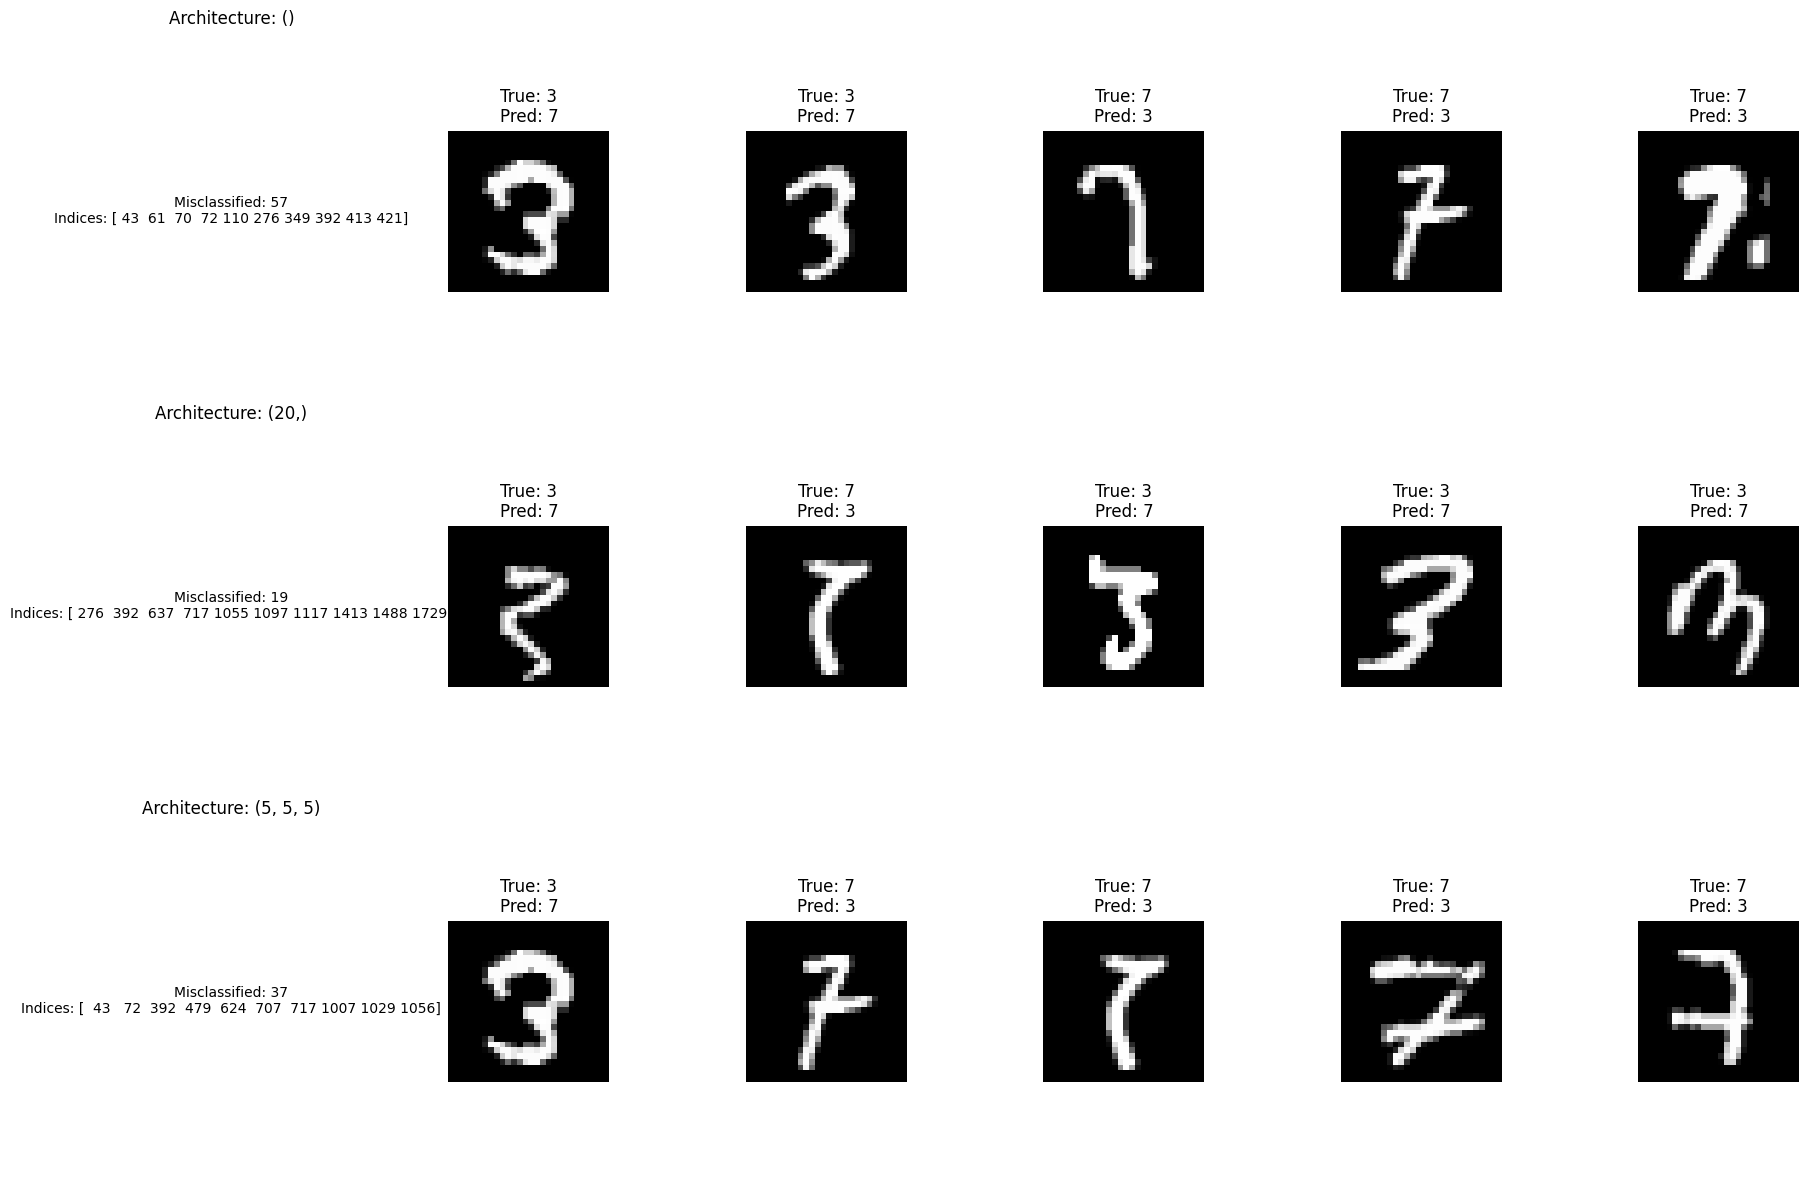

In [ ]:
## Exercise: Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br> `misclass = np.where(test != predictions)` <br>
## Exercise: Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier

## Three different architectures are examined 1) no layers, 2) one layer with 20 nodes and 3) three layers with 5 nodes in each
architectures = [(), (20,), (5, 5, 5)]

# Set up the plot
fig, axes = plt.subplots(3, 6, figsize=(18, 12))  # Adjust grid size

# Iterate over each architecture
for i, architecture in enumerate(architectures):
    # Create and train the neural network model
    model = MLPClassifier(hidden_layer_sizes=architecture, activation='relu', solver='lbfgs', max_iter=5000)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Find misclassifications
    misclassified_indices = np.where(y_pred != y_test)[0]
    num_misclassified = len(misclassified_indices)
    misclassified_indices_list = misclassified_indices[:10]  # Limit to the first 10
    
    # Print misclassification details
    print(f"Architecture: {architecture}")
    print(f"Number of Misclassifications: {num_misclassified}")
    print(f"Indices of Misclassifications: {misclassified_indices_list}")
    print("-" * 50)
    
    # Display the architecture and misclassification info
    axes[i, 0].set_title(f"Architecture: {architecture}")
    axes[i, 0].axis('off')
    misclass_text = f"Misclassified: {num_misclassified}\nIndices: {misclassified_indices_list}"
    axes[i, 0].text(0.5, 0.5, misclass_text, ha='center', va='center', fontsize=10)

    # Plot the first 5 misclassified images
    for j in range(min(5, num_misclassified)):
        # Get the misclassified image index
        index = misclassified_indices[j]
        
        # Get the image and reshape it
        image = X_test[index].reshape(28, 28)  # Direct indexing for NumPy arrays
        
        # Plot the image
        ax = axes[i, j+1]  # Adjusted column indexing
        ax.imshow(image, cmap='gray')
        
        # Use .iloc[] to properly index into y_test if it's a Pandas Series
        true_label = y_test.iloc[index] if isinstance(y_test, pd.Series) else y_test[index]
        pred_label = y_pred[index]
        
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")  # Show true and predicted labels
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The three architectures perform differently. The architecture with one layer and 20 nodes has fewer misclassifications (19) compared to the two others (57 and 37 respectively)

All of the models have misclassifications where it can be understood why it predicts incorrectly, while I would probably say that a human could have predicted most of these correctly. This of course only shows the misclassifications and there could be cases where the model predicted correctly, and a human would have struggled - we do not gain any insights into that in this exercise.

The first datapoint now is: 



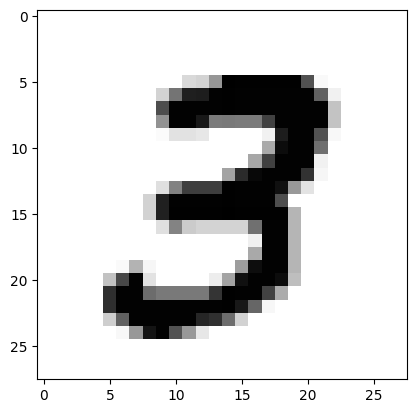

['3' '3' '3' ... '3' '7' '3']
Time it took to learn the linear kernel model: 3.32 seconds
Training Accuracy: 1.00
Test Accuracy: 0.98
Testing architecture: () with activation: relu
Start time is:  10:50:09
End time for model training is:  10:50:11
Before I move on time is:  10:50:11
Testing architecture: (5,) with activation: relu
Start time is:  10:50:11
End time for model training is:  10:50:27
Before I move on time is:  10:50:27
Testing architecture: (10,) with activation: relu
Start time is:  10:50:27
End time for model training is:  10:50:31
Before I move on time is:  10:50:31
Testing architecture: (15,) with activation: relu
Start time is:  10:50:31
End time for model training is:  10:50:36
Before I move on time is:  10:50:36
Testing architecture: (20,) with activation: relu
Start time is:  10:50:36
End time for model training is:  10:50:39
Before I move on time is:  10:50:39
Testing architecture: (5, 5) with activation: relu
Start time is:  10:50:39
End time for model training i

In [30]:
## Question: How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task 
# (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

## Split the mnist_bin data into training and test set. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, random_state=1) # test size 25% and training 75%

kernel_type = 'linear'
start=time.time()
linear_svm = SVC(kernel=kernel_type).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = linear_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = linear_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score
from datetime import datetime
import time
import pandas as pd
import os
import warnings

#print("Imports done and real code execution is starting at this time: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Define architectures and activation functions to test
architectures = [
    (),                     # No hidden layers
    (5,),                  # 1 layer, 5 neurons
    (10,),                 # 1 layer, 10 neurons
    (15,),                  ## one layer 15 neurons
    (20,),
    (5, 5),               # 2 layers, 5 neurons each
    (10, 5),              # 2 layers, 10 neurons in first, 5 in second
    (5, 5, 5),
    (10, 10, 5),         # 3 layers
    (10, 10, 10),
    (15, 15, 15),
    (5, 5, 5, 5),
    (10, 10, 10, 10),
]

activations = ['relu', 'tanh']

# Configuration parameters
solver = 'lbfgs'           # Solver type
max_iter = 5000             # Number of iterations
random_state_no = 11          # Random state for reproducibility

file_path = "mlp_results.csv"

# Store results
results = []

for activation in activations:
    for arch in architectures:
        print(f"Testing architecture: {arch} with activation: {activation}")
        start_model_and_train = time.time()
        print("Start time is: ", time.strftime("%H:%M:%S", time.localtime(start_model_and_train)))
        mlp = MLPClassifier(hidden_layer_sizes=arch, activation=activation, solver=solver, random_state=random_state_no, max_iter=max_iter)            # Number of iterations

        # Train the model and capture warnings
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always", ConvergenceWarning)
            mlp.fit(X_train, y_train)
            # Check for ConvergenceWarning
            convergence_warning = any(issubclass(warn.category, ConvergenceWarning) for warn in w)

        #mlp.fit(X_train, y_train)

        end_model_and_train = time.time()
        print("End time for model training is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))
        
        # Evaluate
        train_acc = mlp.score(X_train, y_train)
        test_acc = mlp.score(X_test, y_test)
        elapsed_time = end_model_and_train - start_model_and_train

        minutes, seconds = divmod(elapsed_time, 60)
        formatted_time = f"{int(minutes)}m {seconds:.2f}s"

       
        # Save results
        results.append({
            "architecture": arch,
            "activation": activation,
            "solver": solver,
            "iterations": max_iter,
            "random_state": random_state_no,
            "train_accuracy": train_acc,
            "test_accuracy": test_acc,
            "time": elapsed_time,
            "formatted_time": formatted_time,
            "converged": "No (Did not converge)" if convergence_warning else "Yes",
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        })
        #print(f"Activation: {activation}, Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}, Time: {time.strftime("%H:%M:%S", time.localtime(elapsed_time))} seconds\n")
        print("Before I move on time is: ", time.strftime("%H:%M:%S", time.localtime(time.time())))

# Create a DataFrame to save results
results_df = pd.DataFrame(results)

# Append results to CSV
if os.path.exists(file_path):
    # Load existing data and append new results
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print("Results saved to", file_path)

print("The results: ",results_df)

In [37]:
!pip install prettytable

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time
import os
from datetime import datetime
from prettytable import PrettyTable
from tabulate import tabulate


## Question: How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task 
# (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

## This next code does a couple of things, let's run through the idea
## In the previous section a number of models were identified that had a good performance, in that accuracy on the test set was very good and the time to learn the model was also better than its peers. These 
#  were based on comparing 3 and 7
## The purpose of this section is to try a number of pairs to see if performance for the models that performed well on 3 and 7 is also good on these pairs. 

## Specifically the pairs 3 and 7, 4 and 5, as well as 0 and 1 are tried. The architecture is configured in the beginning, using the same resolver and with a preset number of max iterations. During the experiment I did change
#  the number of iterations.
## The results along the configuration is saved in a csv file.

# Define digit pairs, neural network configurations, and result storage
digit_pairs = [(7, 3), (4, 5), (0, 1)]  # Pairs to test
nn_configurations = [
    {"architecture": (), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (20,), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (5, 5, 5), "solver": "lbfgs", "iterations": 5000},
]
results = []  # List to store results
file_path = "pair_runs.csv"  # CSV file for results

# Loop through each digit pair
for digit1, digit2 in digit_pairs:
    print(f"Processing pair: {digit1} and {digit2}")

    # Filter dataset for the current pair
    indices = np.logical_or(mnist.target == str(digit1), mnist.target == str(digit2))
    X_pair = mnist.data[indices]
    y_pair = mnist.target[indices]
    y_pair = np.where(y_pair == str(digit1), digit1, digit2)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, random_state=11)

    # Train SVC model
    print(f"Training SVC for pair {digit1}-{digit2}")
    start_svc = time.time()
    svc = SVC(kernel="linear", random_state=11)
    svc.fit(X_train, y_train)
    end_svc = time.time()

    # Evaluate SVC model
    svc_train_acc = round(svc.score(X_train, y_train) * 100, 4)
    svc_test_acc = round(svc.score(X_test, y_test) * 100, 4)
    svc_time_minutes, svc_time_seconds = divmod(end_svc - start_svc, 60)

    # Save SVC results
    results.append({
        "pair": f"{digit1}-{digit2}",
        "model": "SVC",
        "architecture": "N/A",
        "solver": "linear",
        "iterations": "N/A",
        "train_accuracy (%)": f"{svc_train_acc:.4f}",
        "test_accuracy (%)": f"{svc_test_acc:.4f}",
        "time (min:sec)": f"{int(svc_time_minutes)}:{svc_time_seconds:.2f}",
        "converged": "Yes",
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    })

    # Train NN models
    for config in nn_configurations:
        arch = config["architecture"]
        solver = config["solver"]
        iterations = config["iterations"]

        print(f"Training NN for pair {digit1}-{digit2} with architecture {arch}")
        start_nn = time.time()
        nn = MLPClassifier(hidden_layer_sizes=arch, solver=solver, max_iter=iterations, random_state=11)
        
        try:
            nn.fit(X_train, y_train)
            converged = "Yes"
        except Exception as e:
            converged = "No"

        end_nn = time.time()

        # Evaluate NN model
        if converged == "Yes":
            nn_train_acc = round(nn.score(X_train, y_train) * 100, 4)
            nn_test_acc = round(nn.score(X_test, y_test) * 100, 4)
        else:
            nn_train_acc = nn_test_acc = "N/A"

        nn_time_minutes, nn_time_seconds = divmod(end_nn - start_nn, 60)

        # Save NN results
        results.append({
            "pair": f"{digit1}-{digit2}",
            "model": "NN",
            "architecture": f"{arch}",
            "solver": solver,
            "iterations": iterations,
            "train_accuracy (%)": f"{nn_train_acc:.4f}" if nn_train_acc != "N/A" else "N/A",
            "test_accuracy (%)": f"{nn_test_acc:.4f}" if nn_test_acc != "N/A" else "N/A",
            "time (min:sec)": f"{int(nn_time_minutes)}:{nn_time_seconds:.2f}",
            "converged": converged,
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        })

# Save results to CSV
results_df = pd.DataFrame(results)
if os.path.exists(file_path):
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    results_df.to_csv(file_path, index=False)

# Display results in the terminal as a table using PrettyTable
table = PrettyTable()
table.field_names = [
    "Pair", "Model", "Architecture", "Solver", "Iterations",
    "Train Accuracy (%)", "Test Accuracy (%)", "Time (min:sec)", "Converged", "Timestamp"
]

for result in results:
    table.add_row([
        result["pair"],
        result["model"],
        result["architecture"],
        result["solver"],
        result["iterations"],
        result["train_accuracy (%)"],
        result["test_accuracy (%)"],
        result["time (min:sec)"],
        result["converged"],
        result["timestamp"],
    ])

print("\nResults Summary:\n")
print(table)

# Display results as a pandas table in Jupyter
from IPython.display import display
display(results_df)

print(f"\nResults also saved to {file_path}")

Processing pair: 7 and 3
Training SVC for pair 7-3
Training NN for pair 7-3 with architecture ()
Training NN for pair 7-3 with architecture (20,)
Training NN for pair 7-3 with architecture (5, 5, 5)
Processing pair: 4 and 5
Training SVC for pair 4-5
Training NN for pair 4-5 with architecture ()
Training NN for pair 4-5 with architecture (20,)
Training NN for pair 4-5 with architecture (5, 5, 5)
Processing pair: 0 and 1
Training SVC for pair 0-1
Training NN for pair 0-1 with architecture ()
Training NN for pair 0-1 with architecture (20,)
Training NN for pair 0-1 with architecture (5, 5, 5)

Results Summary:

+------+-------+--------------+--------+------------+--------------------+-------------------+----------------+-----------+---------------------+
| Pair | Model | Architecture | Solver | Iterations | Train Accuracy (%) | Test Accuracy (%) | Time (min:sec) | Converged |      Timestamp      |
+------+-------+--------------+--------+------------+--------------------+------------------

,pair,model,architecture,solver,iterations,train_accuracy (%),test_accuracy (%),time (min:sec),converged,timestamp
0,7-3,SVC,N/A,linear,N/A,100.0000,98.1158,0:3.25,Yes,2024-12-10 08:24:34
1,7-3,NN,(),lbfgs,5000,100.0000,98.0327,0:2.36,Yes,2024-12-10 08:24:36
2,7-3,NN,"(20,)",lbfgs,5000,99.9908,99.3904,0:3.54,Yes,2024-12-10 08:24:40
3,7-3,NN,"(5, 5, 5)",lbfgs,5000,99.8430,98.5314,0:7.61,Yes,2024-12-10 08:24:48
4,4-5,SVC,N/A,linear,N/A,100.0000,98.4779,0:2.38,Yes,2024-12-10 08:24:51
5,4-5,NN,(),lbfgs,5000,100.0000,98.6301,0:1.32,Yes,2024-12-10 08:24:52
6,4-5,NN,"(20,)",lbfgs,5000,100.0000,99.6043,0:1.58,Yes,2024-12-10 08:24:54
7,4-5,NN,"(5, 5, 5)",lbfgs,5000,99.9594,99.4825,0:4.26,Yes,2024-12-10 08:24:58
8,0-1,SVC,N/A,linear,N/A,100.0000,99.7294,0:0.63,Yes,2024-12-10 08:24:59
9,0-1,NN,(),lbfgs,5000,100.0000,99.7294,0:0.24,Yes,2024-12-10 08:25:00



Results also saved to pair_runs.csv


Based on the SVC and three different architectures of the NN that overall most precision were obtained in the 0-1 pair. All test accuracy is above 99.7%. The 7-3 pair was the overall lowest with the lowest being 98% and the highest being 99.3%.

The time was between 5 and 0 seconds. For e.g. pair 0-1 the NN with 20 nodes had the same performance as the three layered with 5 nodes at 99.8% but the three layered architecture took 5:37 seconds and the 1 layered only 1:42 seconds around 3 times as long. The architecture without any hidden layer was very fast for 0-1 at 0:24 seconds and had a very good accuracy at 99./

Generally it can be said that accuracy and time taking into account one layer with 20 nodes performed really well balancing time and accuracy. The 3 layered most often took longer than the rest. The perceptron and the SVC were contending for second best performance and only had slight performance differences on this smaller data set. Let's try them both in the next section to see if a more clear performance emerges.

In [ ]:
## Exercise: Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full 
# classification of the 10 classes in the original dataset (after split into train/test).

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time
from datetime import datetime
from prettytable import PrettyTable

# Load the full MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.data = mnist.data.astype(np.float32)
mnist.target = mnist.target.astype(str)

# Neural network configurations to run
nn_configurations = [
    {"architecture": (), "solver": "lbfgs", "iterations": 5000},
    {"architecture": (20,), "solver": "lbfgs", "iterations": 5000},
]

results = []  # List to store results
file_path = "full_dataset_runs.csv"  # Output file

# Split into train and test sets for the entire dataset
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=11)

# Train SVC model
print(f"Training SVC on full dataset")
start_svc = time.time()
svc = SVC(kernel="linear", random_state=11)
svc.fit(X_train, y_train)
end_svc = time.time()

# Evaluate SVC model
svc_train_acc = round(svc.score(X_train, y_train) * 100, 4)
svc_test_acc = round(svc.score(X_test, y_test) * 100, 4)
svc_time_minutes, svc_time_seconds = divmod(end_svc - start_svc, 60)

# Save SVC results
results.append({
    "model": "SVC",
    "architecture": "N/A",
    "solver": "linear",
    "iterations": "N/A",
    "train_accuracy (%)": f"{svc_train_acc:.4f}",
    "test_accuracy (%)": f"{svc_test_acc:.4f}",
    "time (min:sec)": f"{int(svc_time_minutes)}:{svc_time_seconds:.2f}",
    "converged": "Yes",
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
})

# Train NN models
for config in nn_configurations:
    arch = config["architecture"]
    solver = config["solver"]
    iterations = config["iterations"]

    print(f"Training NN with architecture {arch}")
    start_nn = time.time()
    nn = MLPClassifier(hidden_layer_sizes=arch, solver=solver, max_iter=iterations, random_state=11)
    
    try:
        nn.fit(X_train, y_train)
        converged = "Yes"
    except Exception as e:
        converged = "No"

    end_nn = time.time()

    # Evaluate NN model
    if converged == "Yes":
        nn_train_acc = round(nn.score(X_train, y_train) * 100, 4)
        nn_test_acc = round(nn.score(X_test, y_test) * 100, 4)
    else:
        nn_train_acc = nn_test_acc = "N/A"

    nn_time_minutes, nn_time_seconds = divmod(end_nn - start_nn, 60)

    # Save NN results
    results.append({
        "model": "NN",
        "architecture": f"{arch}",
        "solver": solver,
        "iterations": iterations,
        "train_accuracy (%)": f"{nn_train_acc:.4f}" if nn_train_acc != "N/A" else "N/A",
        "test_accuracy (%)": f"{nn_test_acc:.4f}" if nn_test_acc != "N/A" else "N/A",
        "time (min:sec)": f"{int(nn_time_minutes)}:{nn_time_seconds:.2f}",
        "converged": converged,
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv(file_path, index=False)

# Display results as a PrettyTable
table = PrettyTable()
table.field_names = [
    "Model", "Architecture", "Solver", "Iterations",
    "Train Accuracy (%)", "Test Accuracy (%)", "Time (min:sec)", "Converged", "Timestamp"
]

for result in results:
    table.add_row([
        result["model"],
        result["architecture"],
        result["solver"],
        result["iterations"],
        result["train_accuracy (%)"],
        result["test_accuracy (%)"],
        result["time (min:sec)"],
        result["converged"],
        result["timestamp"],
    ])

print("\nResults Summary:\n")
print(table)

# Display results inline in Jupyter
from IPython.display import display
display(results_df)

print(f"\nResults saved to {file_path}")


Training SVC on full dataset


In [ ]:
## ----------------- OBSOLETE TO BE DELETED

## Exercise: Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full 
# classification of the 10 classes in the original dataset (after split into train/test).

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import time
import os

# Load MNIST dataset
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Results storage
results = []

# File path for saving results
file_path = "full_dataset_runs.csv"

def format_time(seconds):
    # Convert time in seconds to hh:mm:ss format.
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}:{seconds:05.2f}"

### Train SVC on full dataset ###
print("Training SVC on full dataset")
start_svc = time.time()
svc = SVC(kernel="linear", random_state=11)
svc.fit(X_train, y_train)
end_svc = time.time()

# Evaluate SVC
svc_train_acc = svc.score(X_train, y_train)
svc_test_acc = svc.score(X_test, y_test)
svc_time = end_svc - start_svc

# Save SVC results
results.append({
    "model": "svc_full",
    "train_accuracy": svc_train_acc,
    "test_accuracy": svc_test_acc,
    "time": format_time(svc_time),
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
})

### Train NN on full dataset ###
print("Training NN on full dataset with 1 layer (20 nodes)")
start_nn = time.time()
nn = MLPClassifier(hidden_layer_sizes=(20,), solver="lbfgs", max_iter=500, random_state=11)

try:
    nn.fit(X_train, y_train)
    converged = "Yes"
except Exception as e:
    converged = "No"
end_nn = time.time()

# Evaluate NN
nn_train_acc = nn.score(X_train, y_train) if converged == "Yes" else "N/A"
nn_test_acc = nn.score(X_test, y_test) if converged == "Yes" else "N/A"
nn_time = end_nn - start_nn

# Save NN results
results.append({
    "model": "nn_full_20",
    "architecture": (20,),
    "solver": "lbfgs",
    "iterations": 500,
    "train_accuracy": nn_train_acc,
    "test_accuracy": nn_test_acc,
    "time": format_time(nn_time),
    "converged": converged,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
})

# Save results to CSV
results_df = pd.DataFrame(results)

if os.path.exists(file_path):
    # Append new data to the existing file
    existing_data = pd.read_csv(file_path)
    updated_data = pd.concat([existing_data, results_df], ignore_index=True)
    updated_data.to_csv(file_path, index=False)
else:
    # Create a new CSV file
    results_df.to_csv(file_path, index=False)

print(f"Results saved to {file_path}")


Training SVC on full dataset


The code below loads the data and makes a train and a test data set

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
    
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
print("data fetched")
X = mnist.data
y = mnist.target.astype(int)  # Ensure labels are integers
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

data fetched


Below code iterates through a number of architectures with the full data set and a set of max iterations

In [20]:
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier
import os
from datetime import datetime

# File path for saving results
file_path = "full_dataset_results.csv"

# Function to format timestamps (start and end)
def format_timestamp(seconds=None):
    """Format epoch time to YYYY-MM-DD HH:MM:SS."""
    if seconds is None:
        seconds = time.time()
    return datetime.fromtimestamp(seconds).strftime("%Y-%m-%d %H:%M:%S")

# Function to format durations in hh:mm:ss
def format_duration(seconds):
    """Convert duration in seconds to hh:mm:ss format."""
    hours, remainder = divmod(int(seconds), 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

# Function to append results to the CSV file
def append_result_to_csv(result, file_path):
    """Append a single result row to the CSV file."""
    result_df = pd.DataFrame([result])
    if not os.path.exists(file_path):
        result_df.to_csv(file_path, index=False)
    else:
        existing_df = pd.read_csv(file_path)
        updated_df = pd.concat([existing_df, result_df], ignore_index=True)
        updated_df.to_csv(file_path, index=False)

# Training and evaluation function
def train_and_evaluate_nn(layers_list, solver, iterations_list, X_train, X_test, y_train, y_test):
    """Train and evaluate a neural network."""
    for layers in layers_list:
        for max_iter in iterations_list:
            try:
                # Log start time
                start_train = time.time()
                start_timestamp = format_timestamp(start_train)
                print(f"Training started at {start_timestamp} with layers={layers}, solver={solver}, max_iter={max_iter}")

                # Initialize NN model
                nn = MLPClassifier(hidden_layer_sizes=layers, solver=solver, max_iter=max_iter, random_state=11)

                # Train model
                try:
                    nn.fit(X_train, y_train)
                    if nn.n_iter_ >= max_iter:
                        converged = "No (Reached max_iter)"
                    else:
                        converged = "Yes"
                except Exception as train_error:
                    converged = f"No (Error: {train_error})"
                    print(f"Training failed: {train_error}")
                    train_acc = "N/A"
                    test_acc = "N/A"
                else:
                    train_acc = nn.score(X_train, y_train) * 100
                    test_acc = nn.score(X_test, y_test) * 100

                end_train = time.time()
                end_timestamp = format_timestamp(end_train)
                training_duration = format_duration(end_train - start_train)
                print(f"Training completed at {end_timestamp}")

                # Evaluate model
                start_eval = time.time()
                print(f"Evaluation started at {format_timestamp(start_eval)}")
                if converged.startswith("Yes"):
                    evaluation_duration = "00:00:00"  # lbfgs solver evaluates implicitly during training
                else:
                    evaluation_duration = format_duration(time.time() - start_eval)

                print(f"Evaluation completed at {format_timestamp(time.time())}")

                # Record results
                result = {
                    "layers": layers,
                    "solver": solver,
                    "max_iter": max_iter,
                    "train_accuracy (%)": f"{train_acc:.4f}" if train_acc != "N/A" else "N/A",
                    "test_accuracy (%)": f"{test_acc:.4f}" if test_acc != "N/A" else "N/A",
                    "training_time": training_duration,
                    "evaluation_time": evaluation_duration,
                    "converged": converged,
                    "start_time": start_timestamp,
                    "end_time": end_timestamp
                }

                # Print the result of the current iteration
                print(f"Iteration Result: {result}")

                # Append the result to the CSV
                append_result_to_csv(result, file_path)

            except Exception as error:
                print(f"An error occurred during training with layers={layers} and max_iter={max_iter}: {error}")
                continue  # Move on to the next iteration

# Example Usage
# Assume X_train, X_test, y_train, y_test are already loaded and split elsewhere
# Define parameters
layers_list = [
    (),  # No hidden layers
    (5,),  # 1 layer, 5 neurons
    (15,),  # 1 layer, 15 neurons
    (5, 5),  # 2 layers, 5 neurons each
    (10, 5),  # 2 layers, 10 neurons in first, 5 in second
    (15, 15),  # 2 layers, 15 neurons each
    (5, 5, 5),  # 3 layers, 5 neurons each
    # (10,),  # 1 layer, 10 neurons (Commented out)
    # (20,),  # 1 layer, 20 neurons (Commented out)
    # (10, 10, 5),  # 3 layers, 10 neurons each in the first two layers, 5 in the third
    # (10, 10, 10),  # 3 layers, 10 neurons each
    (15, 15, 15),  # 3 layers, 15 neurons each
    # (5, 5, 5, 5),  # 4 layers, 5 neurons each (Commented out)
    (10, 10, 10, 10),  # 4 layers, 10 neurons each
]
iterations_list = [500, 2000, 5000]
solver = "lbfgs"

# Call the function
train_and_evaluate_nn(
    layers_list=layers_list,
    solver=solver,
    iterations_list=iterations_list,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)


Training started at 2024-12-06 09:40:06 with layers=(), solver=lbfgs, max_iter=500


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:41:13
Evaluation started at 2024-12-06 09:41:13
Evaluation completed at 2024-12-06 09:41:13
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '92.9107', 'test_accuracy (%)': '89.8786', 'training_time': '00:01:07', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:40:06', 'end_time': '2024-12-06 09:41:13'}
Training started at 2024-12-06 09:41:13 with layers=(), solver=lbfgs, max_iter=2000


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:45:37
Evaluation started at 2024-12-06 09:45:37
Evaluation completed at 2024-12-06 09:45:37
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 2000, 'train_accuracy (%)': '94.3268', 'test_accuracy (%)': '91.4071', 'training_time': '00:04:23', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:41:13', 'end_time': '2024-12-06 09:45:37'}
Training started at 2024-12-06 09:45:37 with layers=(), solver=lbfgs, max_iter=5000


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:56:09
Evaluation started at 2024-12-06 09:56:09
Evaluation completed at 2024-12-06 09:56:09
Iteration Result: {'layers': (), 'solver': 'lbfgs', 'max_iter': 5000, 'train_accuracy (%)': '94.5232', 'test_accuracy (%)': '91.4857', 'training_time': '00:10:31', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:45:37', 'end_time': '2024-12-06 09:56:09'}
Training started at 2024-12-06 09:56:09 with layers=(5,), solver=lbfgs, max_iter=500
Training completed at 2024-12-06 09:56:11
Evaluation started at 2024-12-06 09:56:11
Evaluation completed at 2024-12-06 09:56:11
Iteration Result: {'layers': (5,), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '11.2089', 'test_accuracy (%)': '11.4286', 'training_time': '00:00:02', 'evaluation_time': '00:00:00', 'converged': 'Yes', 'start_time': '2024-12-06 09:56:09', 'end_time': '2024-12-06 09:56:11'}
Training started at 2024-12-06 09:56:11 with layers=(5,), solver=l

c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training completed at 2024-12-06 09:57:44
Evaluation started at 2024-12-06 09:57:44
Evaluation completed at 2024-12-06 09:57:44
Iteration Result: {'layers': (15,), 'solver': 'lbfgs', 'max_iter': 500, 'train_accuracy (%)': '51.4643', 'test_accuracy (%)': '51.4357', 'training_time': '00:01:28', 'evaluation_time': '00:00:00', 'converged': 'No (Reached max_iter)', 'start_time': '2024-12-06 09:56:15', 'end_time': '2024-12-06 09:57:44'}
Training started at 2024-12-06 09:57:44 with layers=(15,), solver=lbfgs, max_iter=2000


KeyboardInterrupt: 

The code below build a NN model with 4 layers, 10 nodes and 5000 in max iterations and makes a confusion matrix

In [ ]:
## Exercise: Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (
# see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

## Building a NN with 4 layers and 10 nodes, using relu and lbfgs and 5000 iterations

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the configuration
layers = (10, 10, 10, 10)
activation = "relu"
solver = "lbfgs"
max_iter = 5000

def build_and_evaluate_nn(X_train, X_test, y_train, y_test):

    # Initialize the model
    model = MLPClassifier(
        hidden_layer_sizes=layers,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    # Train the model
    print(f"Training the model with layers={layers}, activation={activation}, solver={solver}, max_iter={max_iter}")
    try:
        model.fit(X_train, y_train)
        print("Training completed successfully.")
    except Exception as e:
        print(f"An error occurred during training: {e}")
        return

    # Generate predictions
    y_pred = model.predict(X_test)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for Model Configuration: {layers}, {activation}, {solver}, {max_iter}")
    plt.show()

# Example usage:
# Assume X_train, X_test, y_train, and y_test are already defined.
# Uncomment the line below to run the function with your dataset:
# build_and_evaluate_nn(X_train, X_test, y_train, y_test)


In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST dataset
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype("int")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model configuration
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=100,
    batch_size=128,
    alpha=0.0001,
    random_state=42,
    verbose=True  # Enable verbose to monitor convergence
)

# Train the model
print("Training the model...")
model.fit(X_train_scaled, y_train)
print("Training completed.")

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Training the model...
Iteration 1, loss = 0.29130293
Iteration 2, loss = 0.10562392
Iteration 3, loss = 0.06646595
Iteration 4, loss = 0.04825473
Iteration 5, loss = 0.03408653
Iteration 6, loss = 0.02480841
Iteration 7, loss = 0.01772750
Iteration 8, loss = 0.01742728
Iteration 9, loss = 0.01654215
Iteration 10, loss = 0.01820463
Iteration 11, loss = 0.01834300
Iteration 12, loss = 0.00950696
Iteration 13, loss = 0.00726776
Iteration 14, loss = 0.01606887
Iteration 15, loss = 0.01653703
Iteration 16, loss = 0.00860087
Iteration 17, loss = 0.01265896
Iteration 18, loss = 0.00535333
Iteration 19, loss = 0.00692815
Iteration 20, loss = 0.01181867
Iteration 21, loss = 0.00791213
Iteration 22, loss = 0.00428055
Iteration 23, loss = 0.00395473
Iteration 24, loss = 0.01056394
Iteration 25, loss = 0.01230655
Iteration 26, loss = 0.00623483
Iteration 27, loss = 0.01067754
Iteration 28, loss = 0.00811398
Iteration 29, loss = 0.01218561
Iteration 30, loss = 0.00778644
Iteration 31, loss = 0.0029

## -----------------##

We next investigate the capability of the different learning approaches to find a good model, when we know that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [5]:
digit0 = 3
digit1 = 7

cheatcol=np.array(mnist_bin_target) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1

# The type of the target array is originally 'object' (the values '0','1',...,'9' are seen as categorical labels,
# not as numbers). We now want to use the 0's and 1's as numbers: 
cheatcol=cheatcol.astype(float)

cheatcol=np.reshape(cheatcol,[mnist_bin_data.shape[0],1]) #getting the dimensions right for the following .hstack operation to work ... 
mnist_bin_data_cheat = np.hstack((mnist_bin_data,cheatcol)) #appending the new column

All our candidate model types now are able, in principle, to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters, and we can predict 'digit0' if we find a 0 in the last column and 'digit1' if we find a 1. All our SVM or NN network models would in principle be able to do just this, through a suitable setting of the SVM coefficients, respectively the NN weights.

**Exercise 2:** 

**a** Describe, briefly, how the coefficients and weights of an SVM and NN model (with a suitably chosen number of layers) would have to be set, so that the resulting model is 100% accurate on this cheating data. Only consider the accuracy of the SVM or NN classifier defined by the coefficients/weights. You need not take into account that the SVM satisfies the max-margin objective, or that the NN minimizes its error function. This part of the exercise does not involve any Python code. Just give your answer in a short text.

**b** Investigate how the accuracy of different SVM and NN classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why? This part of the exercise is in Python!

**Exercise 2 - Answers**

**a**
For the NN models the model should increase the weight of the cheat column, essentially making it more important while decreasing the weights of all other features. Ideally all other features weight should be as close to 0 as possible while the cheat feature should be as close to 1 as possible. This way it would always or almost always be able to get the correct prediction versus true value.

For SVM the thinking is similar in that the coefficients for non-cheat features should be set to 0 or as close to as possible, while for the cheat feature the model can maximize the margin and achieve a separation what should result in 100% accurate results.

**b**

In [10]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming the cheat column has already been prepared
# mnist_bin_data_cheat is available as input, and mnist_bin_target is the binary target array

# Split data into train and test sets with default split (25% test size)
X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data_cheat, mnist_bin_target, random_state=42)

# SVC classifier
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc_train = svc.predict(X_train)
y_pred_svc_test = svc.predict(X_test)
svc_train_accuracy = accuracy_score(y_train, y_pred_svc_train) * 100
svc_test_accuracy = accuracy_score(y_test, y_pred_svc_test) * 100

# Neural Network classifier (Single-layer Perceptron)
nn = MLPClassifier(hidden_layer_sizes=(), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn_train = nn.predict(X_train)
y_pred_nn_test = nn.predict(X_test)
nn_train_accuracy = accuracy_score(y_train, y_pred_nn_train) * 100
nn_test_accuracy = accuracy_score(y_test, y_pred_nn_test) * 100

# Change cheat column encoding: use 250 for digit1
cheatcol_encoded = np.where(mnist_bin_target == 1, 250, 0).astype(float)
cheatcol_encoded = np.reshape(cheatcol_encoded, [mnist_bin_data.shape[0], 1])
mnist_bin_data_cheat_encoded = np.hstack((mnist_bin_data, cheatcol_encoded))

# Split the re-encoded data
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(mnist_bin_data_cheat_encoded, mnist_bin_target, random_state=42)

# Train and test SVC on re-encoded data
svc.fit(X_train_enc, y_train_enc)
y_pred_svc_train_enc = svc.predict(X_train_enc)
y_pred_svc_test_enc = svc.predict(X_test_enc)
svc_train_accuracy_enc = accuracy_score(y_train_enc, y_pred_svc_train_enc) * 100
svc_test_accuracy_enc = accuracy_score(y_test_enc, y_pred_svc_test_enc) * 100

# Train and test NN on re-encoded data
nn.fit(X_train_enc, y_train_enc)
y_pred_nn_train_enc = nn.predict(X_train_enc)
y_pred_nn_test_enc = nn.predict(X_test_enc)
nn_train_accuracy_enc = accuracy_score(y_train_enc, y_pred_nn_train_enc) * 100
nn_test_accuracy_enc = accuracy_score(y_test_enc, y_pred_nn_test_enc) * 100

# Results
results = pd.DataFrame({
    "Classifier": ["SVC (Original Encoding)", "NN (Original Encoding)", "SVC (Re-encoded)", "NN (Re-encoded)"],
    "Train Accuracy (%)": [
        f"{svc_train_accuracy:.2f}", f"{nn_train_accuracy:.2f}",
        f"{svc_train_accuracy_enc:.2f}", f"{nn_train_accuracy_enc:.2f}"
    ],
    "Test Accuracy (%)": [
        f"{svc_test_accuracy:.2f}", f"{nn_test_accuracy:.2f}",
        f"{svc_test_accuracy_enc:.2f}", f"{nn_test_accuracy_enc:.2f}"
    ]
})

# Display the results table
print(results.to_string(index=False))


             Classifier Train Accuracy (%) Test Accuracy (%)
SVC (Original Encoding)             100.00            100.00
 NN (Original Encoding)             100.00            100.00
       SVC (Re-encoded)             100.00            100.00
        NN (Re-encoded)             100.00            100.00


c:\Users\KennethElong(KEEL)\IdeaProjects\firstPythonProject\firstPyhtonProject\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


For the selected configuration of the SVC and the NN, both the SVC and the NN was able to perfectly predict the true values both in the scenarios of using 0 and 1 to encode the cheat column and when 1 is replaced by 250.

**Exercise 3:** (Now back to the data without a cheating column!) Suppose you want to design a custom kernel function for the MNIST data that better captures the relevant properties of 'similarity' in this data than the generic 'rbf' or 'poly' kernels. Bear in mind that the data as seen by our classifiers and kernel functions just consists of arrays of length 784. 

Describe one or two ideas for defining such a kernel. You need not show that the kernel you propose actually is positive semi-definite (though as a bonus, you can try to provide some arguments for that). This is a text-only exercise -- no sklearn code required!

If you are really curious, you can implement your kernel as a function, and use it as a custom kernel. See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example of how that is done.

**Exercise 3**

**Answer:** one option is to use a convolutional NN model. These model are arranged in a 2D array and are better able to capture local patterns. This model is designed to learn spatial hierarchies of features and for the task with the predicting a number based on a handwritten input, such a model would be expectably fare well.